## to be reviewed

https://machinelearningmastery.com/bayes-theorem-for-machine-learning/

## imports

In [157]:
import pandas as pd
import math
import numpy as np

## Let's first try the bayes theory

In [3]:
def bayes(p_a , p_b_given_a , p_b_given_not_a):
    p_not_a = 1- p_a
    p_b = p_b_given_a * p_a + p_b_given_not_a * p_not_a
    p_a_give_b = (p_b_given_a * p_a) / p_b
    return p_a_give_b


    One percent of women over 50 have breast cancer.
    Ninety percent of women who have breast cancer test positive on mammograms.
    Eight percent of women will have false positives.
    p(cancer) = 0.01
    p(test_positive / cancer) = 0.9
    p(test_positive / not cancer) = 0.08
    
    reuired to calculate if the test is positive what is the probability that the woman has cancer 
    (p(cancer / positive) ) (10%)
   


In [4]:
bayes(p_a = 0.01 , p_b_given_a = 0.9 , p_b_given_not_a = 0.08 )


0.10204081632653063

## Let's try the naiive approach on classification

the naiive approach assumes that the features are independent hence you can multiply the probability by themselves direct 
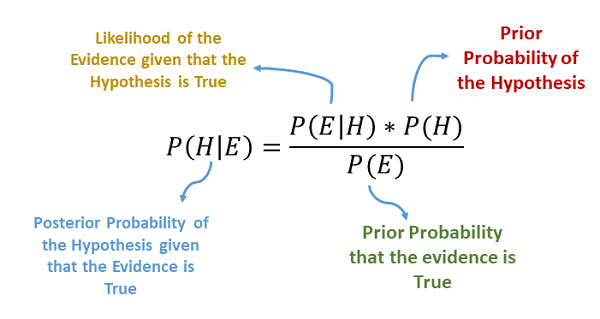

## here E is a vector of multiple features


### create the dataset

In [179]:
df_people = pd.DataFrame({'class': ['m' ,'m' ,'m' , 'm' ,'f' ,'f' ,'f' ,'f'] ,\
              'height':[6 , 5.92 , 5.58 , 5.92 , 5, 5.5 , 5.42 , 5.75]  ,\
              'weight':[180 , 190 , 170 , 165, 100 ,150 , 130 , 150]  ,\
              'foot size':[12,11 , 12 ,10 , 6 , 8,7,9]})

df_people.head()
df_people.describe()
df_people.groupby('class')['height'].describe() # the first column is count sec is mean and third is the std
# df_people.groupby('sex')['height'].mean()
type(float((df_people[df_people['class'] == 'm'].groupby('class')['height'].mean())))
((df_people[df_people['class'] == 'm'].groupby('class')['height'].describe()))['mean']

len(df_people[df_people['class'] == 'm']) / len(df_people)
list(df_people.iloc[0])

['m', 6.0, 180, 12]

In [172]:
df22 = df_people.groupby('class').describe()
# df22[df22['class'] == 'm']
#df22['m']
# type(df22.loc['m']['height']['mean'])
#df22.iloc[1]['height']['mean']
#df22.loc['m']['m']['mean']
list(set (df22.columns.get_level_values(0) ))
#df22.iloc[0]
df22

height                                                    weight  \
       count    mean       std   min    25%   50%     75%   max  count   
class                                                                    
f        4.0  5.4175  0.311809  5.00  5.315  5.46  5.5625  5.75    4.0   
m        4.0  5.8550  0.187172  5.58  5.835  5.92  5.9400  6.00    4.0   

               ...               foot size                                \
         mean  ...    75%    max     count   mean       std   min    25%   
class          ...                                                         
f      132.50  ...  150.0  150.0       4.0   7.50  1.290994   6.0   6.75   
m      176.25  ...  182.5  190.0       4.0  11.25  0.957427  10.0  10.75   

                          
        50%    75%   max  
class                     
f       7.5   8.25   9.0  
m      11.5  12.00  12.0  

[2 rows x 24 columns]

## naiive bayes with multiple classes and multiple features to determine which class

In [216]:

class Bayes():
    """ this class makes a naiive classifier (multi classes ) with continous features only (numeric features)
        and assume that all the features are normally distributed and are independent
        the constructor takes the dataframe containing the features and target column 
        the constructor takes the name of the target column
    """
    #########################################################
    ##clculate the statistics of the data once it is loaded##
    #########################################################
    def __init__(self , df , TARGET_CLASS = 'class'):
        self.df = df
        self.TARGET_CLASS = TARGET_CLASS
        self.df_class_properties = df.groupby(TARGET_CLASS).describe()

    
    def prior_probability(df , target):
        classes = sorted(list( df[target].unique() ) )
        prior = []
        for class_name in classes :
            prior.append( len ( df[ df[target] == class_name ] ) / len(df) )
        return prior
            
        
    
    def calculate_property_by_class(self  , class_index  , propertyy  , feature_name ):
        """this method takes the class name and the feature name and the property to be calculated
            (either mean or std)
            clss index is either 0 or 1
        """
        df_class_properties = self.df_class_properties
        #iloc takes the index
        return float(df_class_properties.iloc[class_index][feature_name][propertyy])
        #pd.groupby(class_name)[feature_name].m
        
    
    def calc_naiive_bayes(self  ,   
                          features_names = None , 
                          x_test = [] ,
                          distribution = 'normal'):
        """ pre requests : all the columns float 
            feature names exists in the dataframe 
            feature values are values of the features to predict and of the same order as the features names
            if features names not given then the feature values of the same order of the columns in the file
        """
        prior = Bayes.prior_probability(self.df , self.TARGET_CLASS) #  probabilities of the classes in alphabet orders
        
        if len(x_test) ==0 :
            return 
        
        if features_names == None :
            #use all the features 
            features_names = list(self.df.columns)
            features_names.remove(self.TARGET_CLASS) 
            
        class_names = []
        prob =[]
        for k in range(len(x_test)): ## looping on the number of records in the test data
            x_test_record = list(x_test.iloc[k])
            prob_class = []
            liklihood_class = []
            
            for j in range(len(prior) ): ## loop on the number of classes
                # this function returns p(all_features / class_j) 
                liklihood_class.append( self.calculate_total_liklihood(class_index = j , 
                                         features_names = features_names ,
                                         x_test = x_test_record,
                                         distribution = distribution) )

                # send the liklihood of being class[j] and prior
                prob_class.append(  Bayes.naiive_bayes(liklihood_class[j] , prior[j] ) ) # this will return the p(female/feature) (but without the denumenator)
            
            #for every k (number of records in the test data ) calculate the predicted class and its probability
            class_index = np.argmax(prob_class)
            class_names.append ( self.df_class_properties.index[class_index] )
            if sum(prob_class) == 0:
                probability = 0
            else:
                probability =  max(prob_class) / sum(prob_class)
            prob.append( probability )
        return class_names , prob 
        
        
    def calculate_total_liklihood( self , class_index , features_names , x_test ,  distribution = 'normal'):
        """ this function calculate the total liklihood of the class (the propability of some features given the class)
            this function uses the naiive approach that all the features are independent hence : their joint probability
            is the multiplication of them 
        """
        liklihood_class = 1 ## just a dummy variable to clac the liklihood of all the features (p(feture/class0))
        liklihood_class_1 = 1
        
        for i in range( len(features_names) ):
            # loop on the features and calculate for each one the liklihood of the class 
            liklihood_class_featurei = self.calculate_liklihood(distribution = distribution,
                                                     class_index = class_index , 
                                                     feature = features_names[i] , 
                                                     feature_value = x_test[i]) 

            #this returns the liklihood probability of class(p(all features / class)) = the multiplication( p(feature[i] / class0) )
            liklihood_class *=liklihood_class_featurei

        return liklihood_class
    
    
    def norm_probability(x , mean , std_deviation):
        """this function takes the value of the feature and returns the normal probability of it
            to compute the liklihood
        """
        variance = std_deviation**2
        numenator = math.exp(-(x-mean)**2 / (2*variance))
        denumenator = math.sqrt(2*math.pi *variance)
        return numenator / denumenator
    
    
    def calculate_liklihood( self , distribution , class_index , feature , feature_value):
        mean = self.calculate_property_by_class( class_index ,  'mean' , feature )
        std_deviation = self.calculate_property_by_class( class_index ,  'std' , feature )
        if distribution == 'normal':
            liklihood = Bayes.norm_probability(feature_value , mean , std_deviation)
            return liklihood
        
    
    def naiive_bayes(liklihood , prior ):
        """this is the same as bayes but assume features are independent
            and the denumenator is not computed
        """
        return prior * liklihood # I will not compute the denumenator (naiive assumption)
        


### testing the Bayes class

In [217]:
bayes = Bayes(df_people)# make the object
class_name , probability  = bayes.calc_naiive_bayes( x_test = pd.DataFrame({ 's': [6 ],'ss': [130] ,'f' :  [8] }) )  
print (f'the predicted class is {class_name} with probability {(probability) } ')

the predicted class is ['f'] with probability [0.9999884769336502] 


## testing the classifier on Breast Cancer Data (with no preprocessing):

In [243]:
from sklearn.model_selection import train_test_split
data = pd.read_csv("Breast_cancer_data.csv")

train, test = train_test_split(data, test_size=.2, random_state=43)

X_test = test.iloc[:,:-1]
Y_test = test.iloc[:,-1]

bayes = Bayes(train , TARGET_CLASS= 'diagnosis')
Y_pred , probabilities = bayes.calc_naiive_bayes(x_test = X_test)

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))
#(Y_pred[1])


[[36  3]
 [ 1 74]]
0.9736842105263157


## The accuracy is between 92 and 97% according to the random_state
## Still a good accuracy given that we didn't make any EDA (remove the features with high correlation)

## testing the naiive bayes on iris data set

In [251]:
import plotly.express as px
#dir(px)

In [245]:
dir(px.data)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'carshare',
 'election',
 'election_geojson',
 'experiment',
 'gapminder',
 'iris',
 'medals_long',
 'medals_wide',
 'stocks',
 'tips',
 'wind']

In [ ]:
df = px.data.iris()
df.drop(columns = ['species'] , inplace = True) # equivilant to labels = ['species'] , axis =1
df

In [262]:

train, test = train_test_split(df, test_size=.2, random_state=2)

X_test = test.iloc[:,:-1]
Y_test = test.iloc[:,-1]

bayes = Bayes(train , TARGET_CLASS= 'species_id')
Y_pred , probabilities = bayes.calc_naiive_bayes(x_test = X_test)

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred , average = 'micro'))

[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
0.9666666666666667


## WOW  again gives a very good accuracy